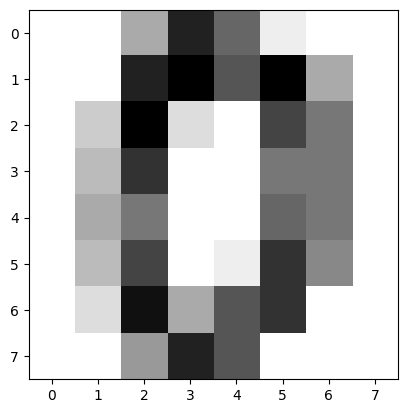

In [7]:
# 1. 데이터셋 준비
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

# 2. 이미지 평탄화(2차원 배열의 이미지들을 1차원으로)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 3. 데이터 셋 분류(훈련 데이터와 테스트 데이터로)

X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)

In [5]:
# 모델 준비

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
# 1. 결정트리
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# 2. 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 3. KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# 4. 로지스틱 회귀
lr = LogisticRegression(
    max_iter=200,       # 반복 충분히 늘려줘야 수렴함
    solver='lbfgs',      # MNIST에서는 lbfgs가 잘 맞음
    multi_class='multinomial',  # 다중 클래스 분류
    random_state=42
)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
# 모델 평가

from sklearn.metrics import accuracy_score

print("Decision Tree:", accuracy_score(y_test, dt_pred))
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("KNN:", accuracy_score(y_test, knn_pred))
print("Logistic Regression:", accuracy_score(y_test, lr_pred))

Decision Tree: 0.8333333333333334
Random Forest: 0.9611111111111111
KNN: 0.9694444444444444
Logistic Regression: 0.9416666666666667


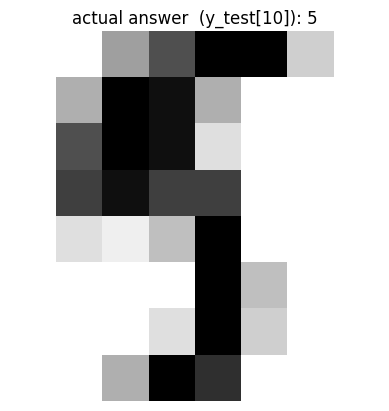

=== 모델별 예측 결과 ===
Decision Tree 예측: 5
Random Forest 예측: 5
KNN 예측: 5
Logistic Regression 예측: 5
정답: 5


In [14]:
# 모델 평가 시각화

import matplotlib.pyplot as plt

# 테스트할 인덱스 선택
idx = 10

# 이미지 시각화
plt.imshow(X_test[idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"actual answer  (y_test[{idx}]): {y_test[idx]}")
plt.axis('off')
plt.show()

# 4개 모델 예측 결과
dt_pred_single = dt.predict([X_test[idx]])
rf_pred_single = rf.predict([X_test[idx]])
knn_pred_single = knn.predict([X_test[idx]])
lr_pred_single = lr.predict([X_test[idx]])

print("=== 모델별 예측 결과 ===")
print(f"Decision Tree 예측: {dt_pred_single[0]}")
print(f"Random Forest 예측: {rf_pred_single[0]}")
print(f"KNN 예측: {knn_pred_single[0]}")
print(f"Logistic Regression 예측: {lr_pred_single[0]}")
print(f"정답: {y_test[idx]}")

